# Show avg syllable duration across age

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from aging.plotting import (
    format_plots,
    save_factory,
    figure,
    PLOT_CONFIG,
    COLORMAPS,
)

In [2]:
format_plots()
saver = save_factory(PLOT_CONFIG.save_path / "fig2-panels", tight_layout=False)

## Males

In [3]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_syllable_df_v00.parquet')

In [4]:
df['idx'] = np.arange(len(df))
df.loc[df['onsets'], 'dur'] = df.query('onsets')['idx'].diff()
df['dur'] = df['dur'].ffill()
df = df.drop(columns=['idx'])

In [5]:
durs = df.groupby(['age', 'mouse'])['dur'].mean() / 30

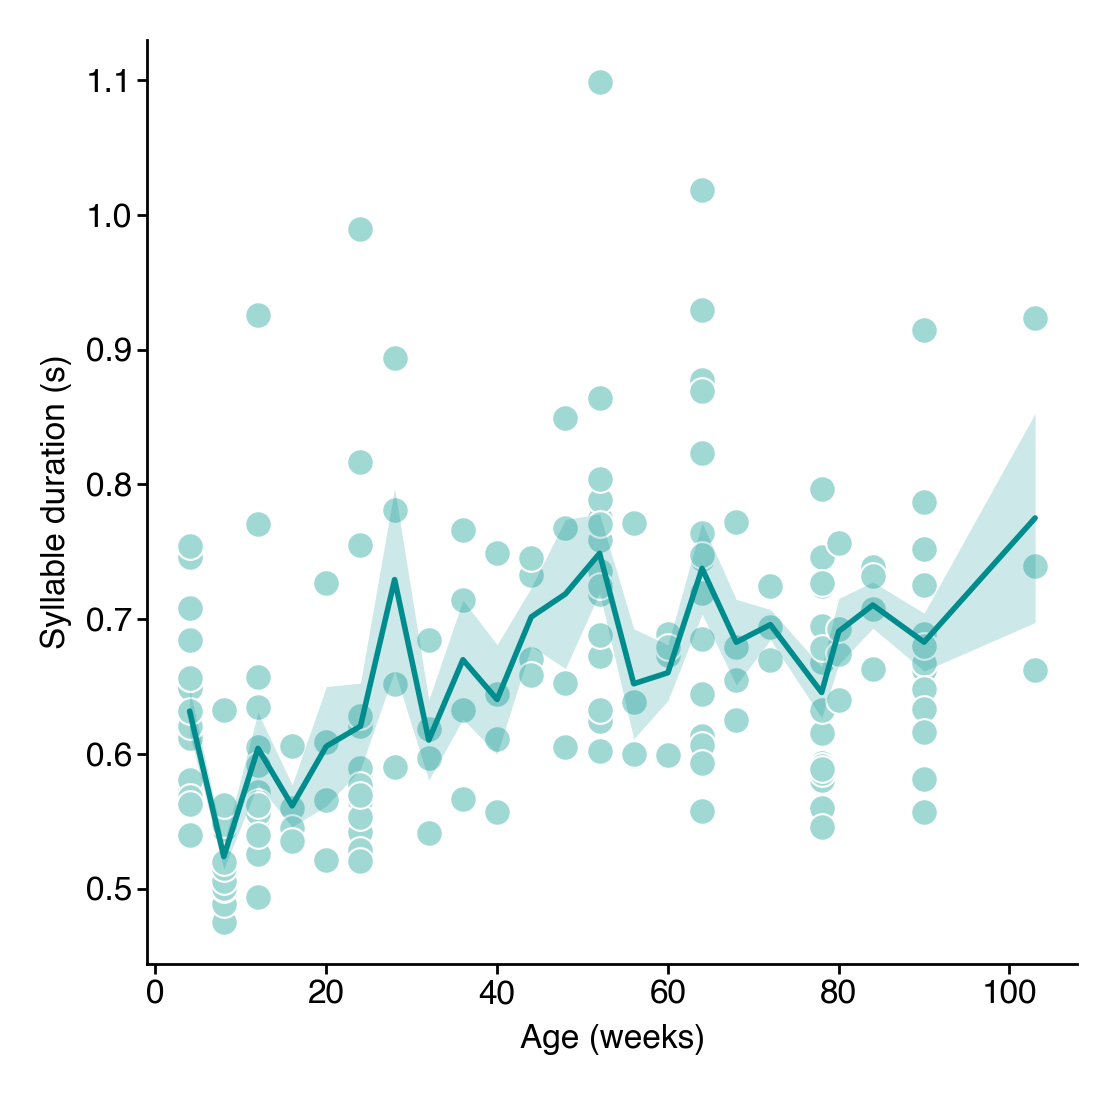

In [6]:
ax = sns.scatterplot(data=durs.reset_index(), x='age', y='dur', color=COLORMAPS.ont_male(50))
ax = sns.lineplot(data=durs.reset_index(), x='age', y='dur', errorbar='se', color=COLORMAPS.ont_male(255), err_kws=dict(lw=0))
ax.set(xlabel="Age (weeks)", ylabel="Syllable duration (s)")
sns.despine()

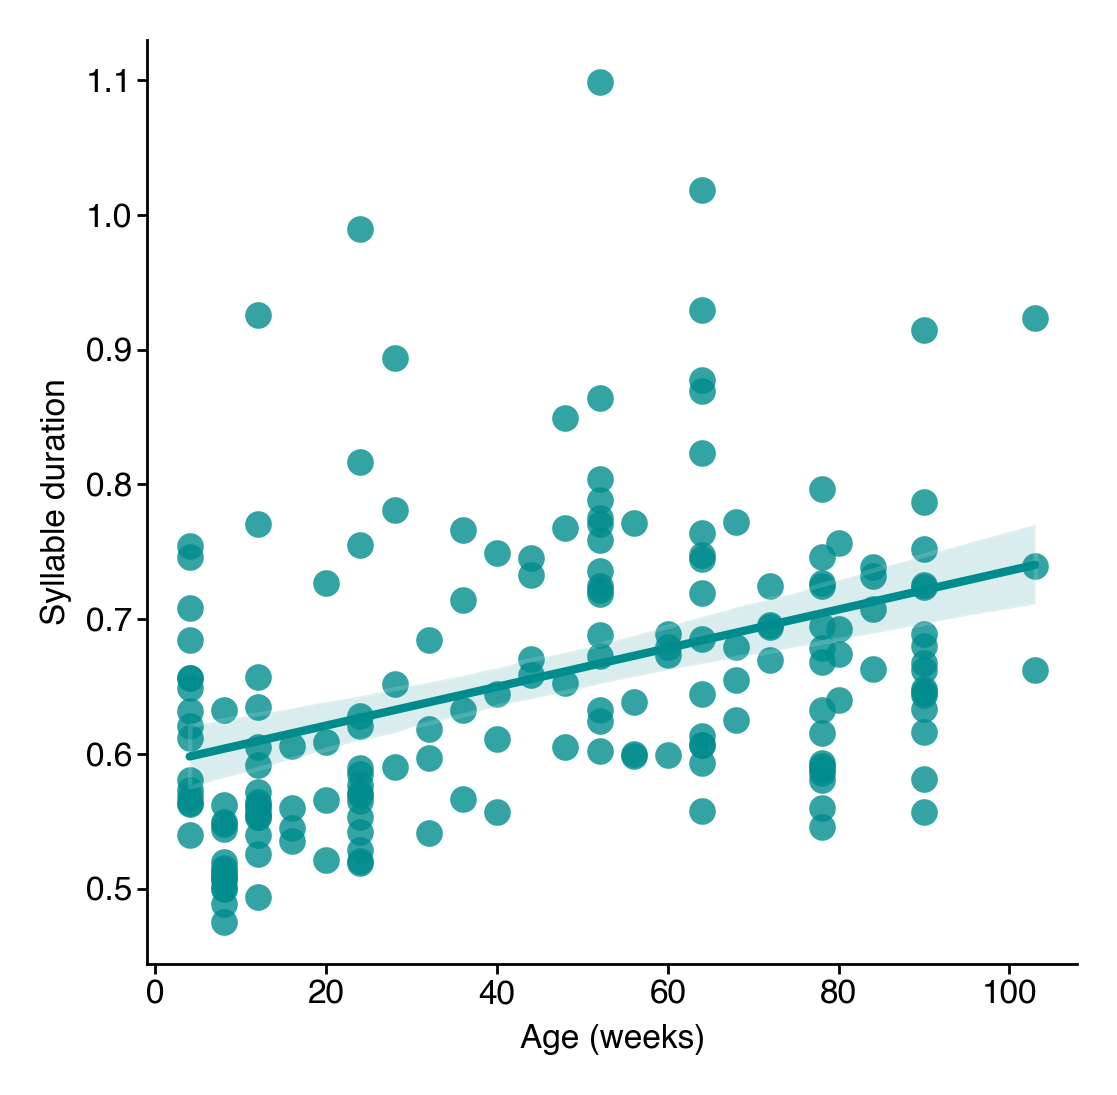

In [7]:
ax = sns.regplot(
    data=durs.reset_index(),
    x="age",
    y="dur",
    color=COLORMAPS.ont_male(255),
    scatter_kws=dict(linewidths=0),
)
ax.set(xlabel="Age (weeks)", ylabel="Syllable duration")
sns.despine()

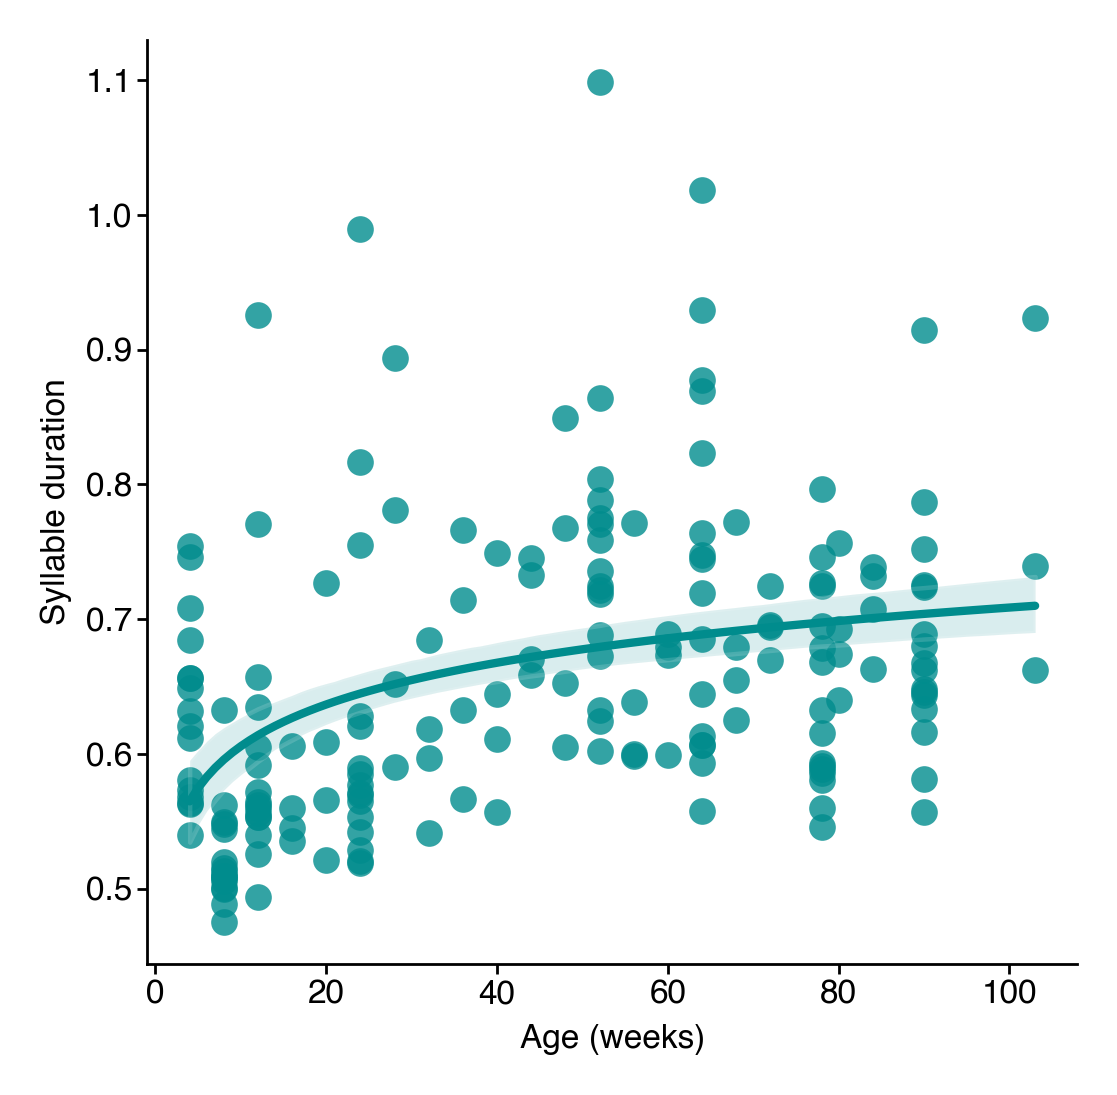

In [8]:
ax = sns.regplot(
    data=durs.reset_index(), x="age", y="dur", color=COLORMAPS.ont_male(255), logx=True, scatter_kws=dict(linewidths=0),
)
ax.set(xlabel="Age (weeks)", ylabel="Syllable duration")
sns.despine()

In [9]:
dur_df = durs.reset_index()
dur_bins = pd.cut(dur_df['age'], 7, labels=False)
dur_df['bins'] = dur_bins
age_map = dur_df.groupby('bins')['age'].mean()
dur_df['avg_age'] = dur_df['bins'].map(age_map).round(0)

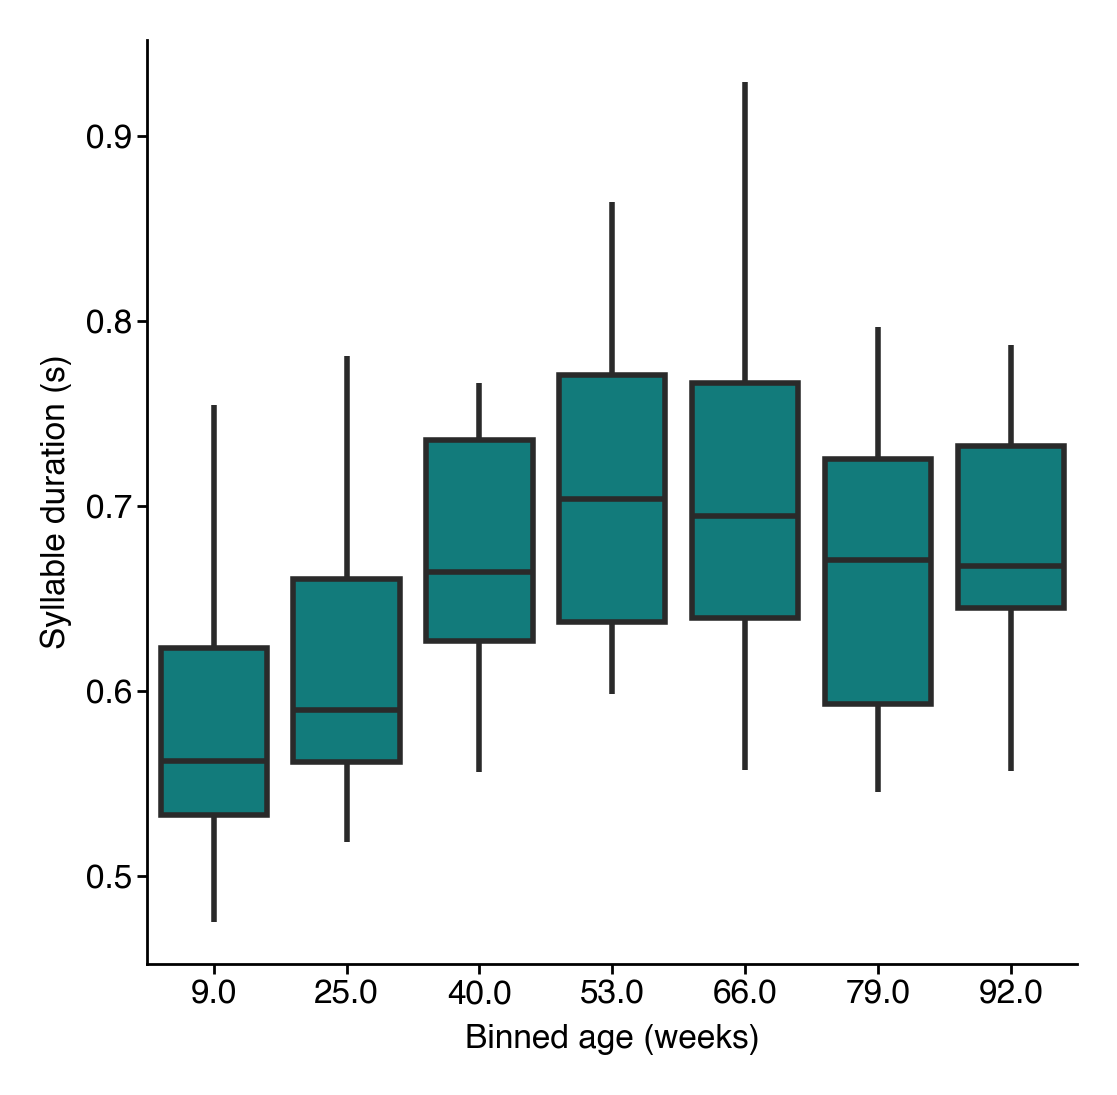

In [10]:
ax = sns.boxplot(
    data=dur_df.reset_index(),
    x="avg_age",
    y="dur",
    showcaps=False,
    showfliers=False,
    color=COLORMAPS.ont_male(255),
)
ax.set(xlabel="Binned age (weeks)", ylabel="Syllable duration (s)")
sns.despine()

## Females

In [11]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_females_syllable_df_v00.parquet')

In [12]:
df['idx'] = np.arange(len(df))
df.loc[df['onsets'], 'dur'] = df.query('onsets')['idx'].diff()
df['dur'] = df['dur'].ffill()
df = df.drop(columns=['idx'])

In [14]:
durs = df.groupby(['age', 'mouse'])['dur'].mean() / 30
durs = durs[durs < 1.3]

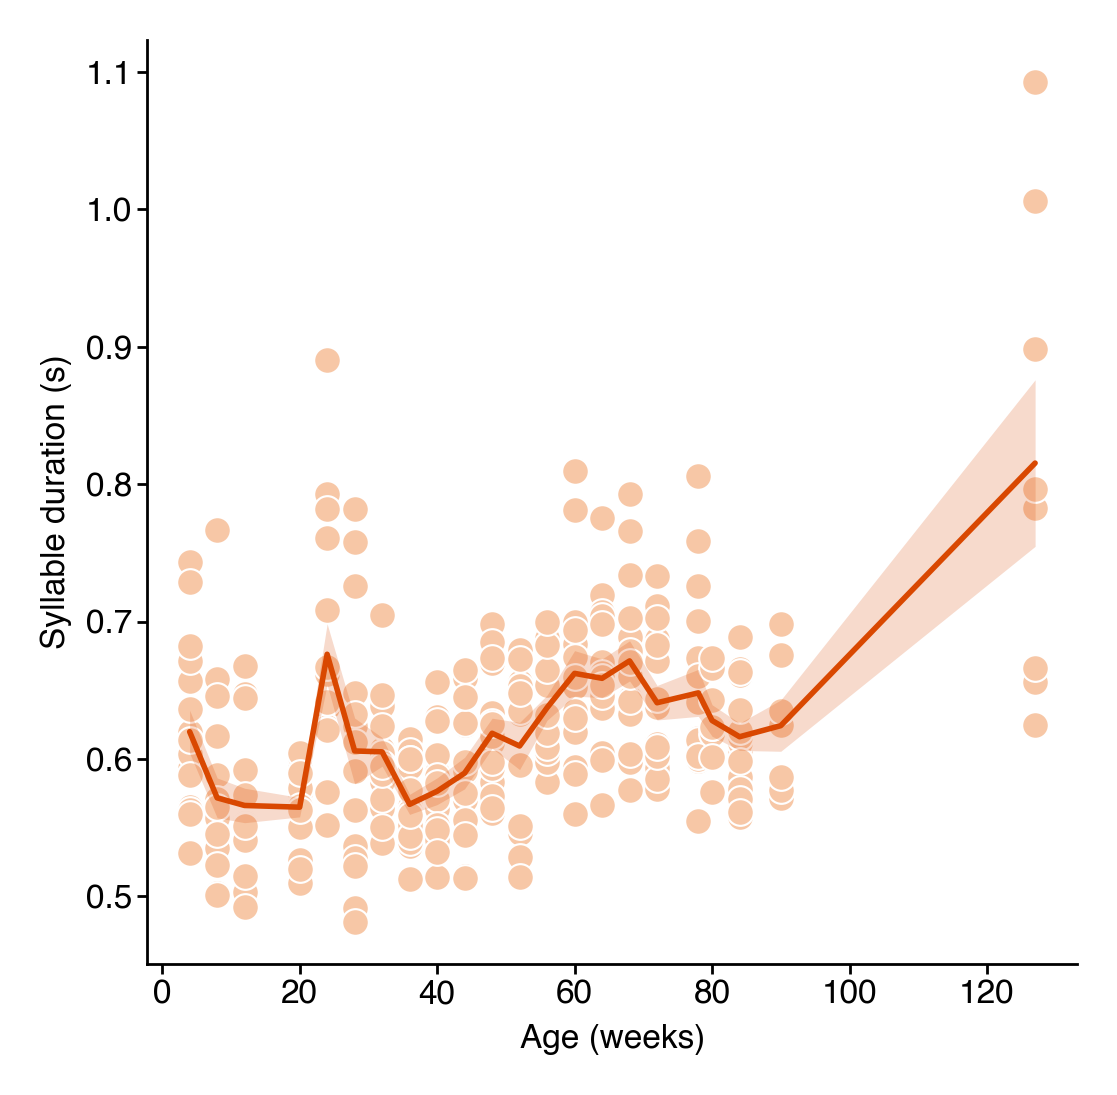

In [15]:
ax = sns.scatterplot(data=durs.reset_index(), x='age', y='dur', color=COLORMAPS.ont_female(50))
ax = sns.lineplot(data=durs.reset_index(), x='age', y='dur', errorbar='se', color=COLORMAPS.ont_female(255), err_kws=dict(lw=0))
ax.set(xlabel="Age (weeks)", ylabel="Syllable duration (s)")
sns.despine()

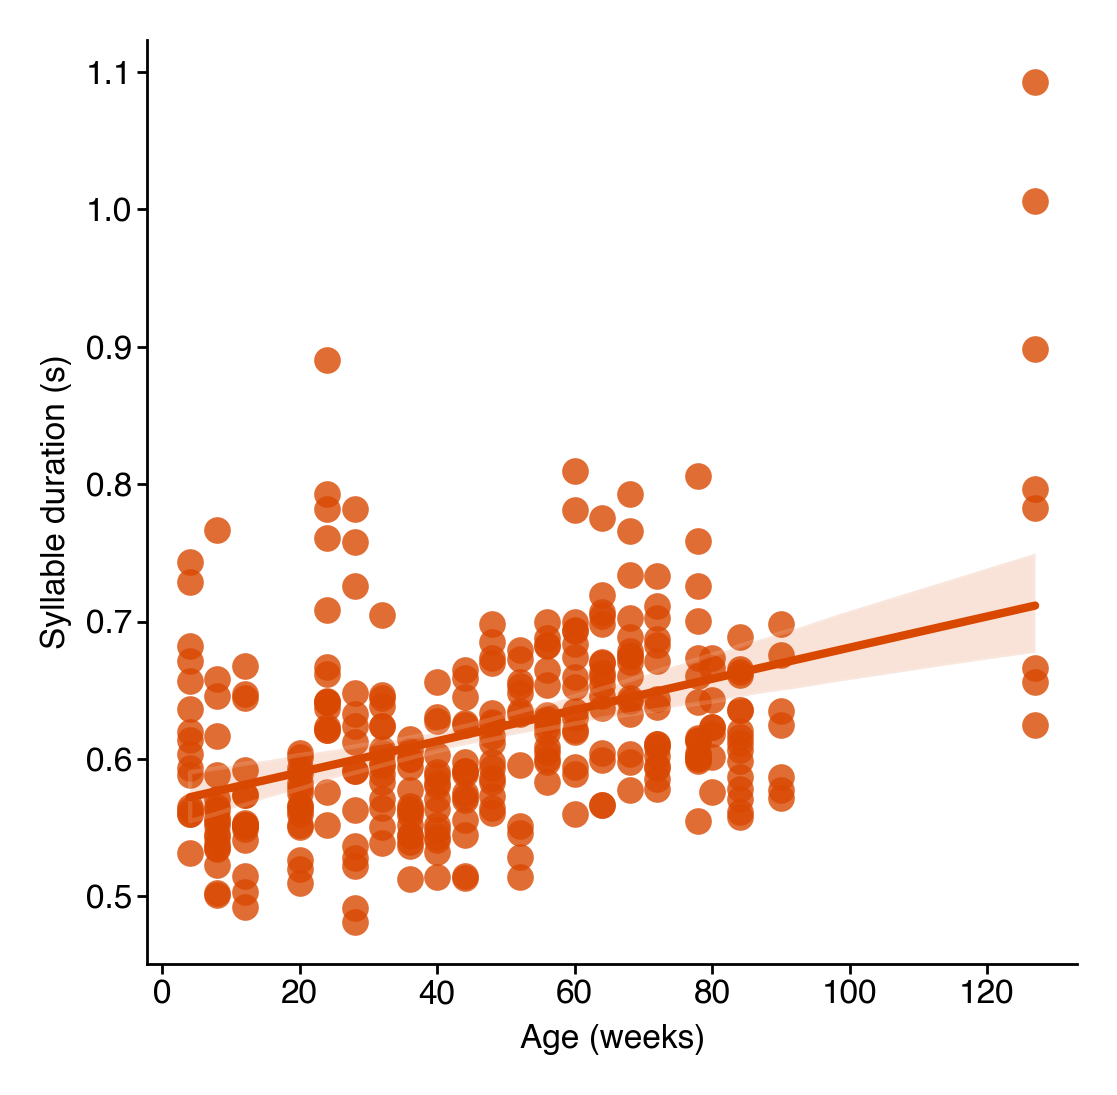

In [16]:
ax = sns.regplot(
    data=durs.reset_index(),
    x="age",
    y="dur",
    color=COLORMAPS.ont_female(255),
    scatter_kws=dict(linewidths=0),
)
ax.set(xlabel="Age (weeks)", ylabel="Syllable duration (s)")
sns.despine()

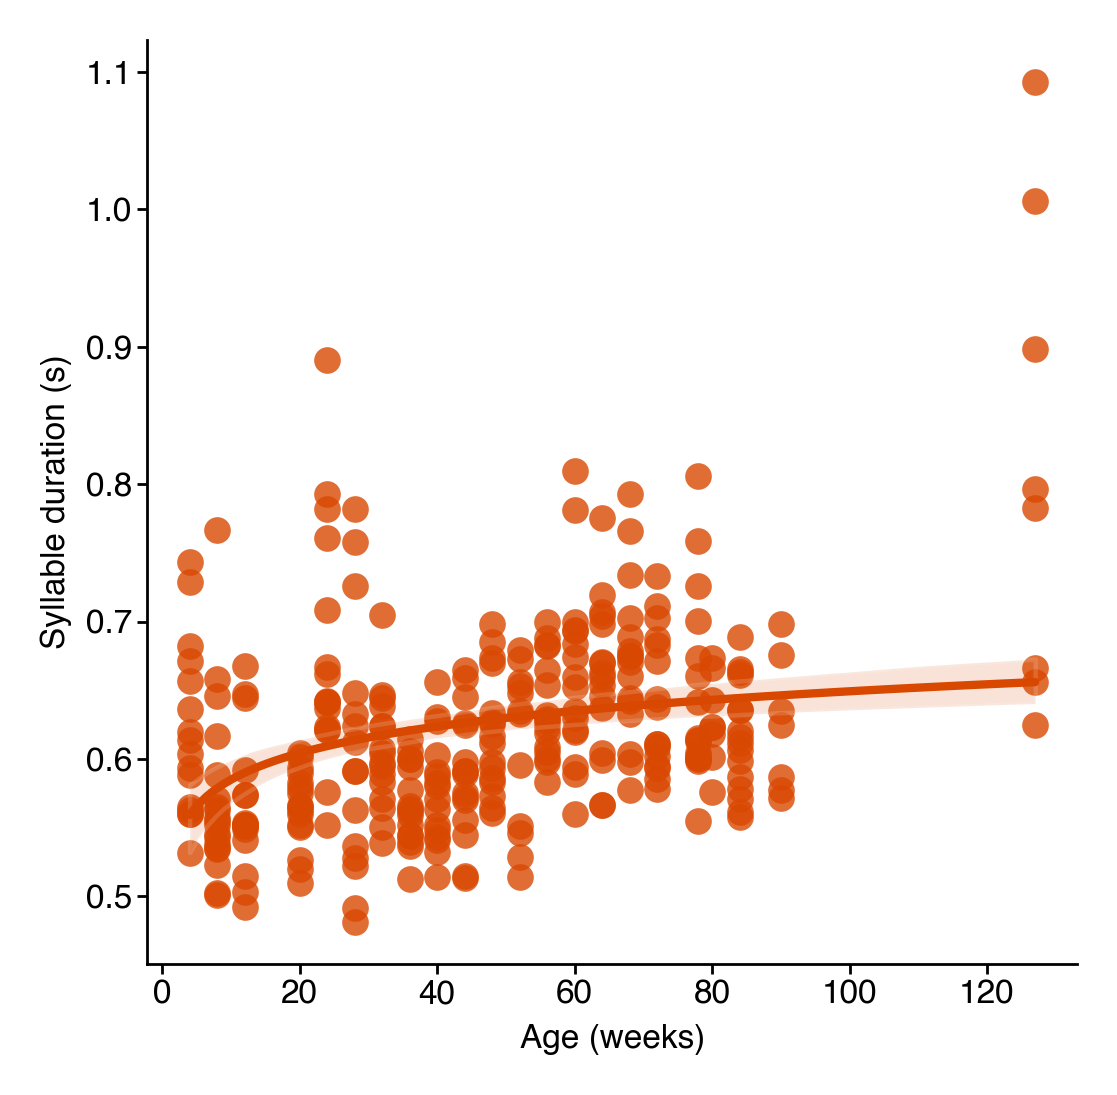

In [17]:
ax = sns.regplot(
    data=durs.reset_index(), x="age", y="dur", color=COLORMAPS.ont_female(255), logx=True, scatter_kws=dict(linewidths=0),
)
ax.set(xlabel="Age (weeks)", ylabel="Syllable duration (s)")
sns.despine()

In [18]:
dur_df = durs.reset_index()
dur_bins = pd.cut(dur_df['age'], 7, labels=False)
dur_df['bins'] = dur_bins
age_map = dur_df.groupby('bins')['age'].mean()
dur_df['avg_age'] = dur_df['bins'].map(age_map).round(0)

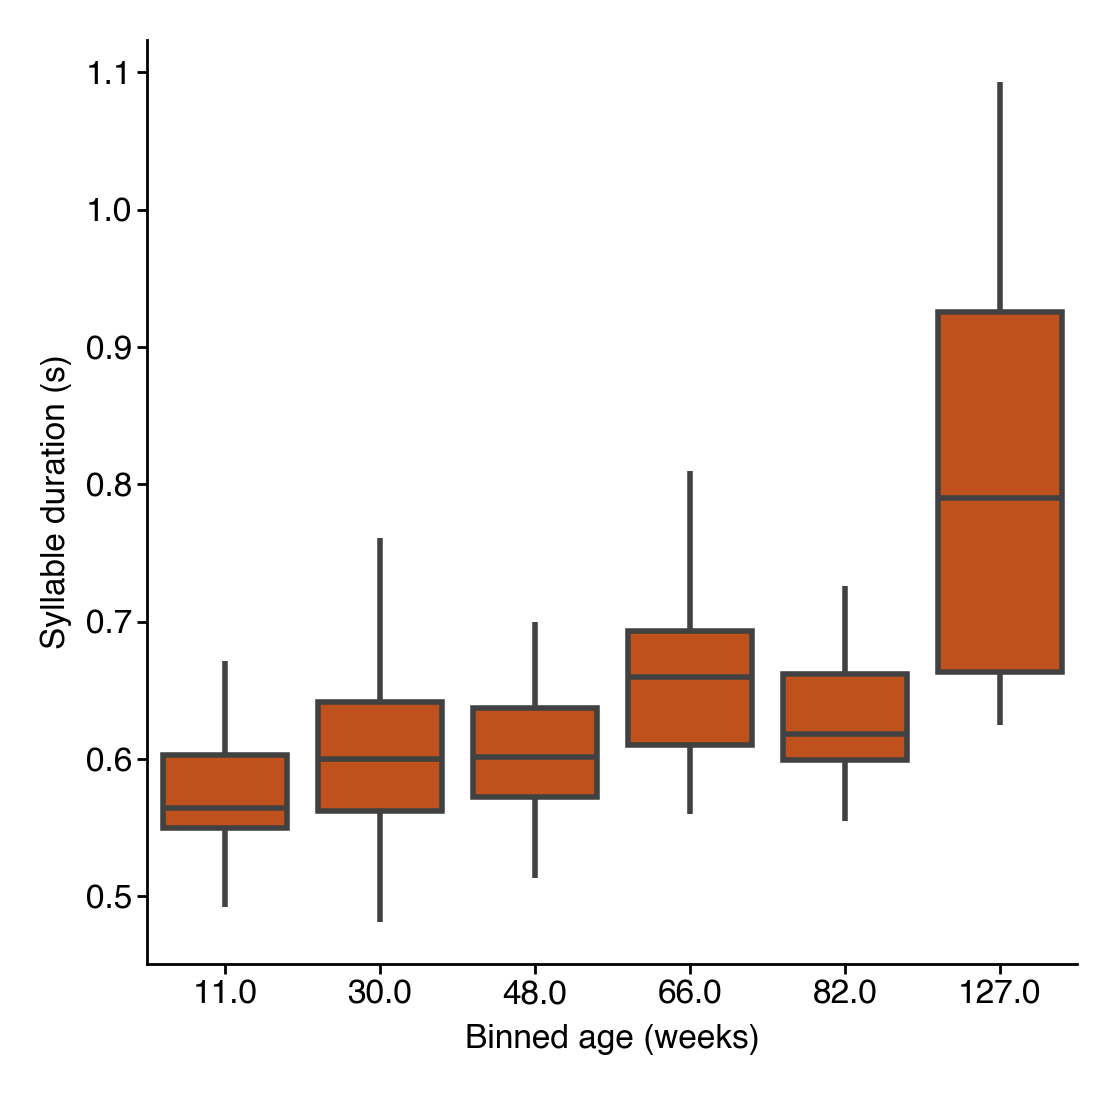

In [19]:
ax = sns.boxplot(
    data=dur_df.reset_index(),
    x="avg_age",
    y="dur",
    showcaps=False,
    showfliers=False,
    color=COLORMAPS.ont_female(255),
)
ax.set(xlabel="Binned age (weeks)", ylabel="Syllable duration (s)")
sns.despine()